In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('mymoviedb.csv', lineterminator = '\n')

df.head()


Release_Date                    Title  \
0   2021-12-15  Spider-Man: No Way Home   
1   2022-03-01               The Batman   
2   2022-02-25                  No Exit   
3   2021-11-24                  Encanto   
4   2021-12-22           The King's Man   

                                            Overview  Popularity  Vote_Count  \
0  Peter Parker is unmasked and no longer able to...    5083.954        8940   
1  In his second year of fighting crime, Batman u...    3827.658        1151   
2  Stranded at a rest stop in the mountains durin...    2618.087         122   
3  The tale of an extraordinary family, the Madri...    2402.201        5076   
4  As a collection of history's worst tyrants and...    1895.511        1793   

   Vote_Average Original_Language                               Genre  \
0           8.3                en  Action, Adventure, Science Fiction   
1           8.1                en            Crime, Mystery, Thriller   
2           6.3                en                            Thriller   
3           7.7                en  Animation, Comedy, Family, Fantasy   
4           7.0                en    Action, Adventure, Thriller, War   

                                          Poster_Url  
0  https://image.tmdb.org/t/p/original/1g0dhYtq4i...  
1  https://image.tmdb.org/t/p/original/74xTEgt7R3...  
2  https://image.tmdb.org/t/p/original/vDHsLnOWKl...  
3  https://image.tmdb.org/t/p/original/4j0PNHkMr5...  
4  https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...

 DROPING THE COLOUMN

In [83]:
# casting column a
df['Release_Date'] = pd.to_datetime(df['Release_Date'])
# confirming changes
print(df['Release_Date'].dtypes)


datetime64[ns]


In [84]:
df['Release_Date'] = df['Release_Date'].dt.year
df['Release_Date'].dtypes

dtype('int32')

In [85]:
df.head()


Release_Date                    Title  \
0          2021  Spider-Man: No Way Home   
1          2022               The Batman   
2          2022                  No Exit   
3          2021                  Encanto   
4          2021           The King's Man   

                                            Overview  Popularity  Vote_Count  \
0  Peter Parker is unmasked and no longer able to...    5083.954        8940   
1  In his second year of fighting crime, Batman u...    3827.658        1151   
2  Stranded at a rest stop in the mountains durin...    2618.087         122   
3  The tale of an extraordinary family, the Madri...    2402.201        5076   
4  As a collection of history's worst tyrants and...    1895.511        1793   

   Vote_Average Original_Language                               Genre  \
0           8.3                en  Action, Adventure, Science Fiction   
1           8.1                en            Crime, Mystery, Thriller   
2           6.3                en                            Thriller   
3           7.7                en  Animation, Comedy, Family, Fantasy   
4           7.0                en    Action, Adventure, Thriller, War   

                                          Poster_Url  
0  https://image.tmdb.org/t/p/original/1g0dhYtq4i...  
1  https://image.tmdb.org/t/p/original/74xTEgt7R3...  
2  https://image.tmdb.org/t/p/original/vDHsLnOWKl...  
3  https://image.tmdb.org/t/p/original/4j0PNHkMr5...  
4  https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...

In [86]:
cols = ['Overview', 'Original_Language', 'Poster_Url']

df.drop(cols, axis = 1, inplace = True)
df.columns


Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre'],
      dtype='object')

In [87]:
df.head()

Release_Date                    Title  Popularity  Vote_Count  \
0          2021  Spider-Man: No Way Home    5083.954        8940   
1          2022               The Batman    3827.658        1151   
2          2022                  No Exit    2618.087         122   
3          2021                  Encanto    2402.201        5076   
4          2021           The King's Man    1895.511        1793   

   Vote_Average                               Genre  
0           8.3  Action, Adventure, Science Fiction  
1           8.1            Crime, Mystery, Thriller  
2           6.3                            Thriller  
3           7.7  Animation, Comedy, Family, Fantasy  
4           7.0    Action, Adventure, Thriller, War

In [91]:
def catigorize_col(df, col, labels):
    edges = [
        df[col].describe()['min'],
        df[col].describe()['25%'],
        df[col].describe()['50%'],
        df[col].describe()['75%'],
        df[col].describe()['max'] + 0.001  # add small value to avoid binning issue
    ]
    df[col] = pd.cut(df[col], edges, labels=labels, duplicates='drop')
    return df



In [92]:
# define labels for edges
labels = ['not_popular', 'below_avg', 'average', 'popular']
# categorize column based on labels and edges
catigorize_col(df, 'Vote_Average', labels)
# confirming changes
df['Vote_Average'].unique()


['popular', 'below_avg', 'average', 'not_popular', NaN]
Categories (4, object): ['not_popular' < 'below_avg' < 'average' < 'popular']

In [93]:
df.head()

Release_Date                    Title  Popularity  Vote_Count Vote_Average  \
0          2021  Spider-Man: No Way Home    5083.954        8940      popular   
1          2022               The Batman    3827.658        1151      popular   
2          2022                  No Exit    2618.087         122    below_avg   
3          2021                  Encanto    2402.201        5076      popular   
4          2021           The King's Man    1895.511        1793      average   

                                Genre  
0  Action, Adventure, Science Fiction  
1            Crime, Mystery, Thriller  
2                            Thriller  
3  Animation, Comedy, Family, Fantasy  
4    Action, Adventure, Thriller, War

In [125]:
df.dropna(inplace = True)
# confirming
df.isna().sum()


Release_Date    0
Title           0
Popularity      0
Vote_Count      0
Vote_Average    0
Genre           0
dtype: int64

In [123]:
sns.set_style('whitegrid')

# Q1: What is the most frequent genre in the dataset?


In [97]:
df['Genre'].describe()


count      9727
unique     2324
top       Drama
freq        458
Name: Genre, dtype: object

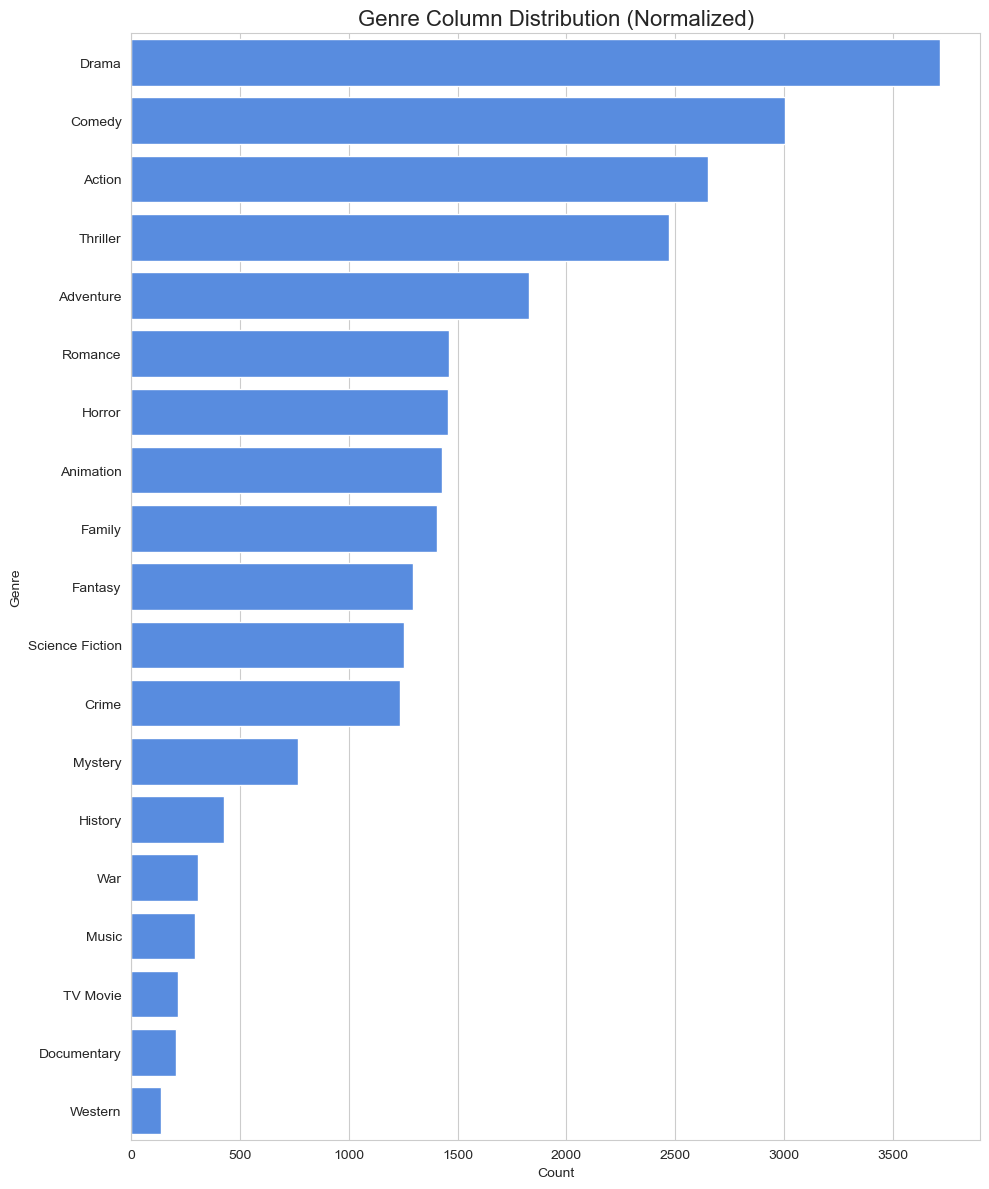

In [129]:
# 1. Split comma-separated genres into multiple rows
df_genre = df['Genre'].dropna().str.split(',')  # split by comma
df_genre = df_genre.explode().str.strip()       # explode and clean whitespace

# 2. Now plot with cleaned genre values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 12))  # Taller figure to fit all genres

sns.countplot(y=df_genre, order=df_genre.value_counts().index, color='#4287f5')

plt.title('Genre Column Distribution (Normalized)', fontsize=16)
plt.xlabel('Count')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()



# Q2: What genres has highest votes ?


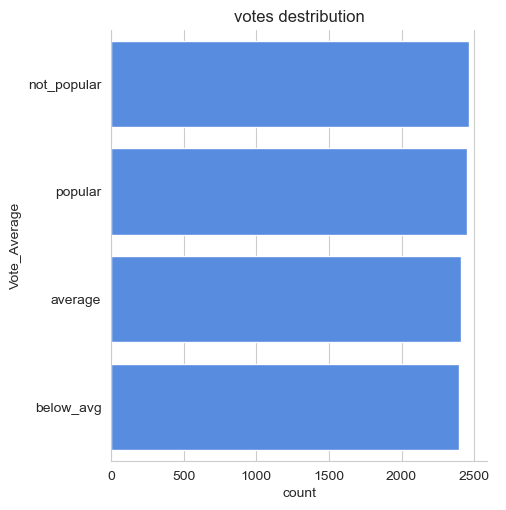

In [130]:
sns.catplot(y = 'Vote_Average', data = df, kind = 'count',
 order = df['Vote_Average'].value_counts().index,
 color = '#4287f5')
plt.title('votes destribution')
plt.show() 

# Q3: What movie got the highest popularity ? what's its genre ?

In [131]:
df[df['Popularity'] == df['Popularity'].max()]

Release_Date                    Title  Popularity  Vote_Count Vote_Average  \
0          2021  Spider-Man: No Way Home    5083.954        8940      popular   

                                Genre  
0  Action, Adventure, Science Fiction

# Q4: What movie got the lowest popularity? what's its genre?

In [133]:
df[df['Popularity'] == df['Popularity'].min()]



Release_Date                                 Title  Popularity  \
9825          2021  The United States vs. Billie Holiday      13.354   
9826          1984                               Threads      13.354   

      Vote_Count Vote_Average                        Genre  
9825         152      average        Music, Drama, History  
9826         186      popular  War, Drama, Science Fiction

# Q5: Which year has the most filmmed movies?


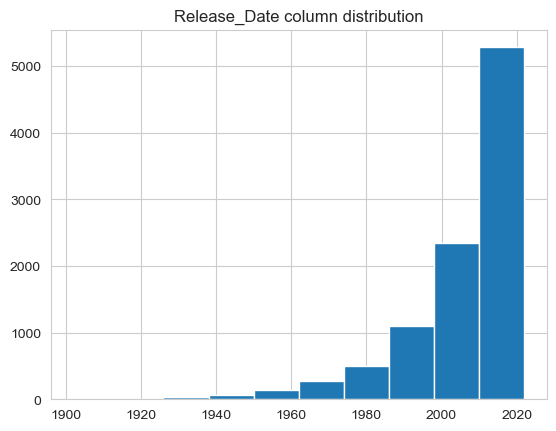

In [134]:
df['Release_Date'].hist()
plt.title('Release_Date column distribution')
plt.show()
